# Global Power Plant Database Project


# Description


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



# Key Attributes of the Database


The database includes the following indicators:-

country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long (text): longer form of the country designation

name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts
    
latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
    
generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

    

# AIM

Prediction : Make two prediction

1  Primary Fuel

2  capacity_mw

# Load Libraries

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



# Load The Data

In [2]:
df = pd.read_csv('poweplant.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape


(907, 27)

We have 907 rows and 27 columns in data

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

We are going to remove some columns those having maximum no of null values because if we fill those values prediction 
will not correct

In [6]:
df.drop(["other_fuel1", "other_fuel2","generation_gwh_2013","generation_gwh_2019","other_fuel3", "owner", "wepp_id",
        "generation_data_source", "estimated_generation_gwh"], axis=1, inplace=True)

In [7]:
df.shape

(907, 18)

In [8]:
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
generation_gwh_2014      371
generation_gwh_2015      396
generation_gwh_2016      403
generation_gwh_2017      408
generation_gwh_2018      410
dtype: int64

In [9]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


now we will remove that columns which have only one unique value and which does not has any contribution in prediction

In [10]:
df.drop(["country", "country_long", "year_of_capacity_data", "name", "gppd_idnr", "url"], axis=1, inplace=True)


In [11]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381062,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [12]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [13]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)


In [14]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)


C:\Users\Subham\AppData\Local\Temp\ipykernel_7784\1614785979.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median()[0], inplace=True)


In [15]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,Coal,2015.0,Ultratech Cement ltd,WRI,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,Wind,2015.0,CDM,WRI,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,WRI,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,2015.0,Karnataka Power Corporation Limited,Industry About,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,Wind,2015.0,CDM,WRI,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,Coal,2015.0,Hindustan Zinc ltd,WRI,59.200000,59.200000,59.200000,59.200000,59.200000


In [16]:
df.isna().sum()


capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

now my data looks like fair

In [17]:
#Checking the value counts 
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [18]:
#Checking the value counts 
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [19]:
#Checking the value counts 
df["geolocation_source"].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

# univariate analysis

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

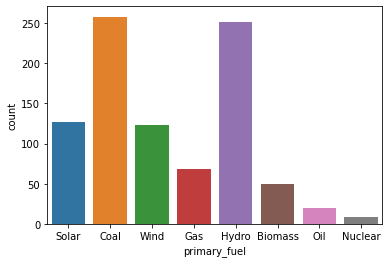

In [20]:
# checking count plot of fuel
sns.countplot(x="primary_fuel", data=df)

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

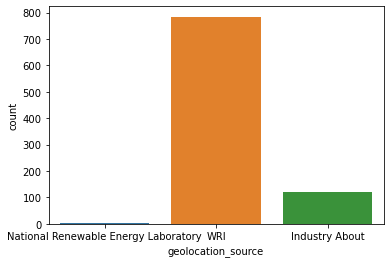

In [21]:
# checking count plot of fuel
sns.countplot(x="geolocation_source", data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

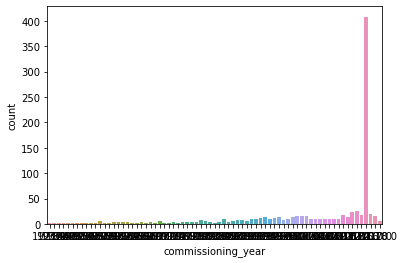

In [22]:
# checking count plot of fuel
sns.countplot(x="commissioning_year", data=df)

# bivarite analysis

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

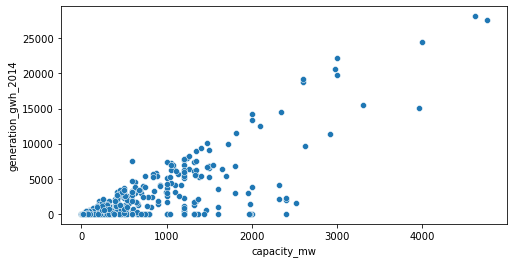

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)


We can notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity 
in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

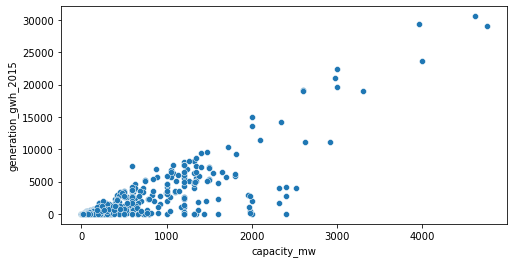

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)


In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of 
electrical generating capacity in megawatts in 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

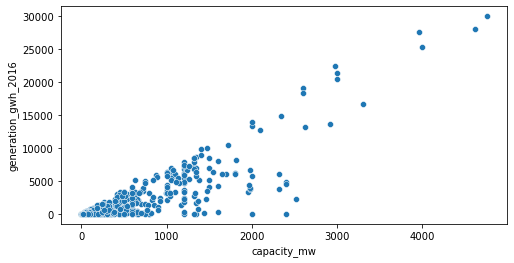

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)


In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of 
electrical generating capacity in megawatts in 2016

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

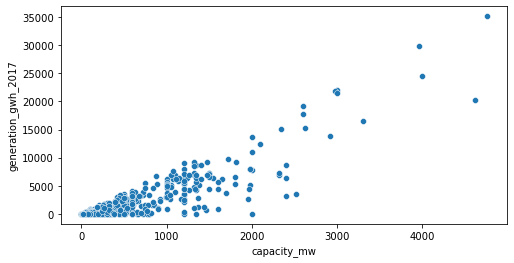

In [26]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)


In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of 
electrical generating capacity in megawatts in 2017

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

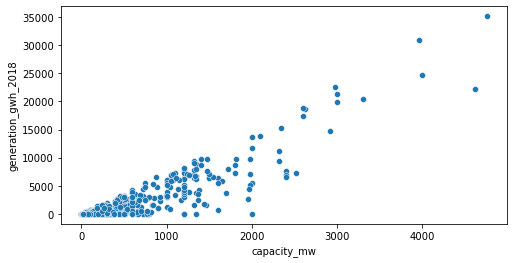

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)


In 2018 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of 
electrical generating capacity in megawatts in 2018

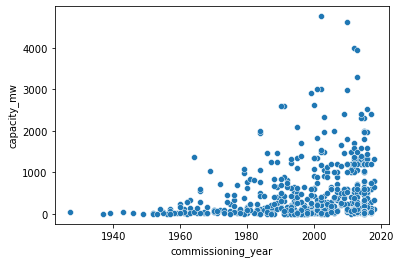

In [28]:
sns.scatterplot(x = "commissioning_year", y = "capacity_mw", data = df)
plt.show()


by above plot we can see that as commissionong year is increases capicity also increases.

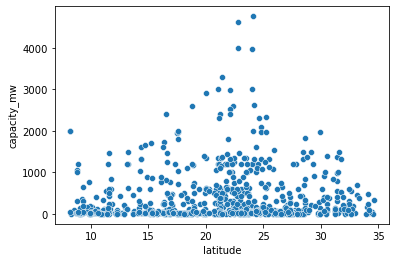

In [29]:
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()


there are no relation in above plot

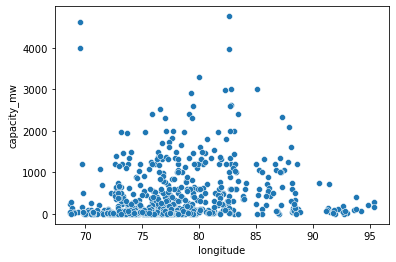

In [30]:
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()


there are no relation in above plot

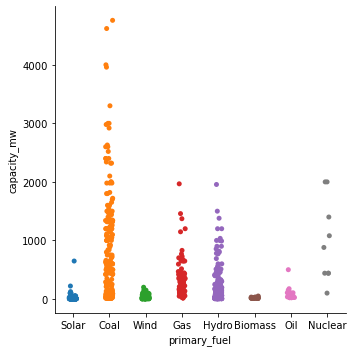

In [31]:

sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()


in above plot we can see that coal has highest capicity 

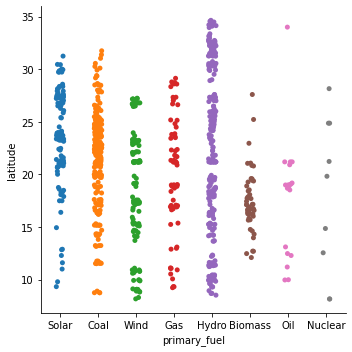

In [32]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()


there are no relation in above plot

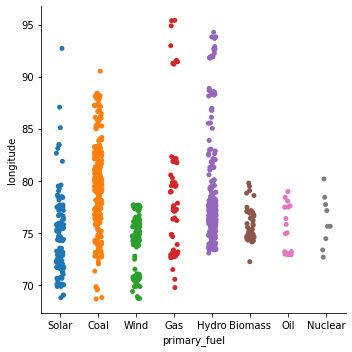

In [33]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()


there are no relation in above plot

now convet object data type to int data typr using label encoder

In [34]:
# Label Encoder

le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df['geolocation_source'] = le.fit_transform(df['geolocation_source'])
df['source'] = le.fit_transform(df['source'])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,59.200000,59.200,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,2015.0,174,2,59.200000,59.200,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,2015.0,21,2,59.200000,59.200,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


# using heat map check correlation

In [35]:
dfcorr=df.corr()


<AxesSubplot:>

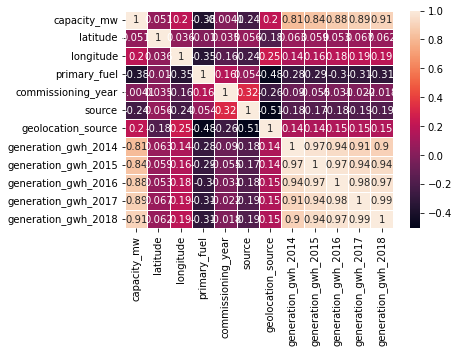

In [36]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

# checking outliers

by the heat map we can clearly see that there are no correlation problem found

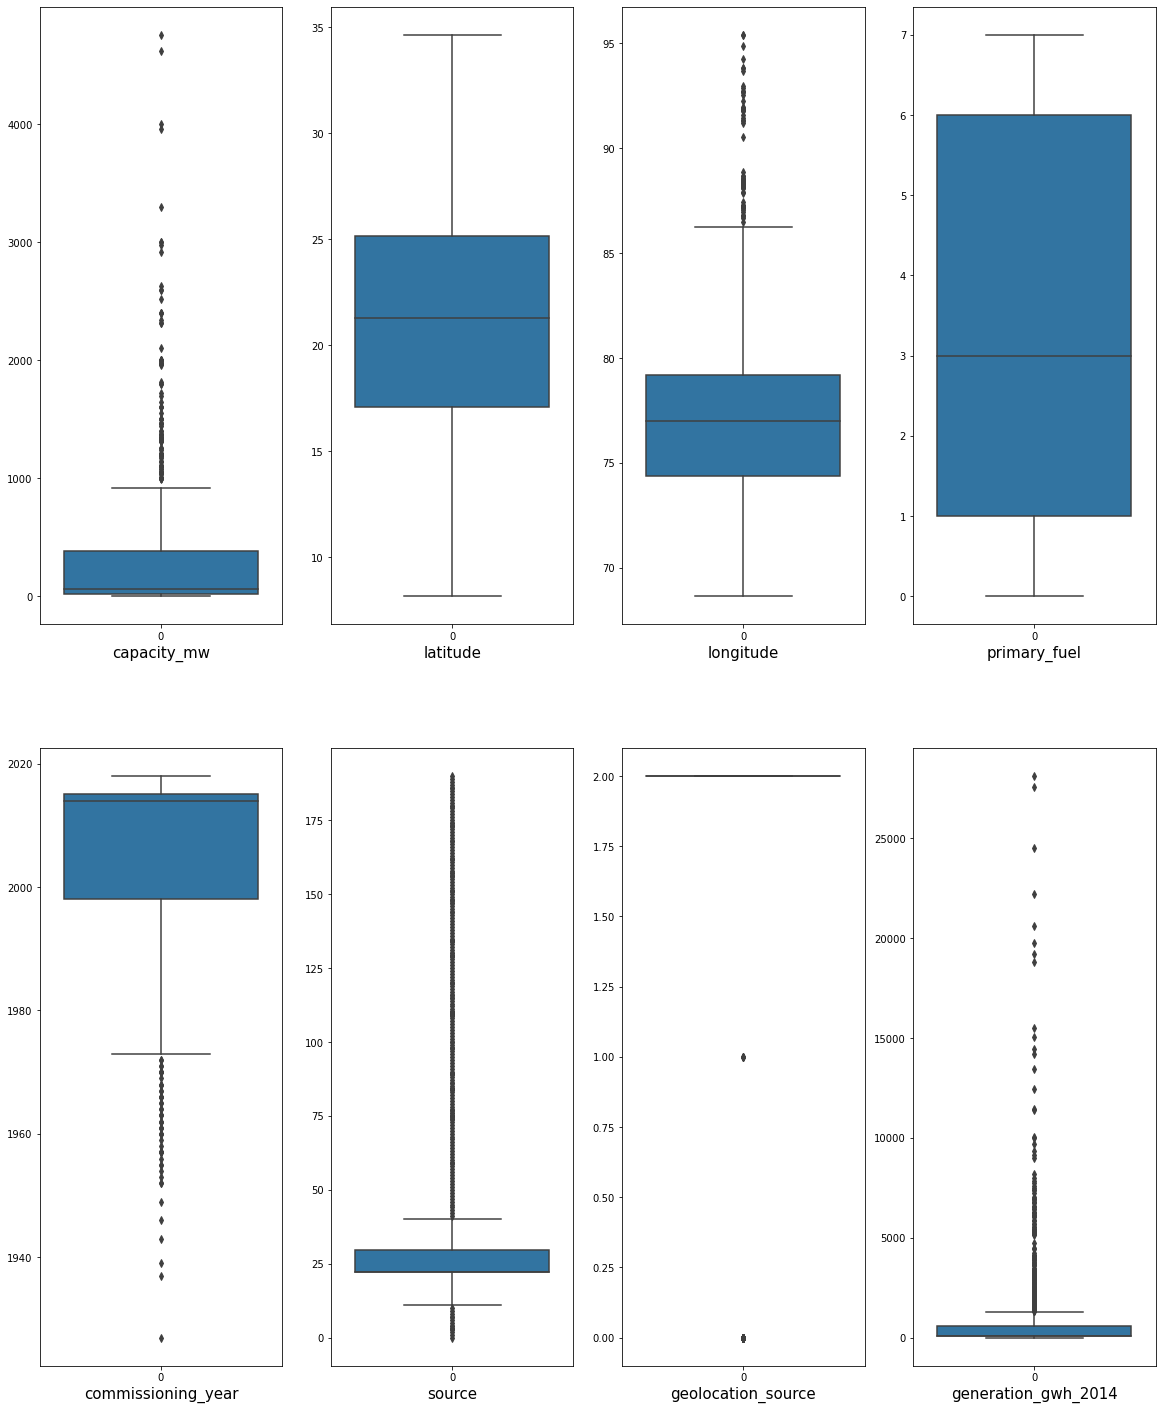

In [37]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,25)) 
graph = 1

for column in df:
    if graph<=8:
        plt.subplot(2,4, graph)
        ax=sns.boxplot(data= df [column])
        plt.xlabel(column, fontsize=15)
    graph+=1
    
plt.show()    
    

so there are outliers present now its time to remove outliers

# removing outliers

In [38]:
# checking the outlirs which have high value from z score
z=np.abs(zscore(df))
print(np.where(z>3))


(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
       299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342, 345,
       360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427, 444,
       454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573, 577, 583,
       601, 621, 623, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657,
       657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706,
       709, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726,
       726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786, 788,
       807, 808, 808, 808, 808, 808, 808, 818, 832, 847, 848, 870, 871,
       879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64), array([ 0,  8,  9, 10, 11,  5,  5,  0,  7,  8,  9, 10, 11,  0,  7,  2,  2,
        5,  0,  7,  8,  9, 10, 11,  4,  2,  5,  0,  7,  8,  9, 10

In [39]:
# removing outlirs which have high value of z score
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (833, 12)
Percentage of data loss post outlier removal:  8.158765159867695


# Dividing Data into X and Y

In [42]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']


In [43]:
x.shape

(833, 11)

In [44]:
y.shape

(833,)

# Scaling X values

In [45]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
X.head() # Displaying all the features after applying scaling technique to avoid bias output


,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.153959,-0.886974,1.168658,0.379969,1.572182,-1.054576,-0.440702,-0.454301,-0.463956,-0.472159,-0.471889
1,0.597055,-0.569521,-0.992737,0.666472,3.115127,0.402243,-0.440702,-0.454301,-0.463956,-0.472159,-0.471889
2,0.130605,-1.784255,1.600937,0.666472,-0.516728,0.402243,-0.440702,-0.454301,-0.463956,-0.472159,-0.471889
3,0.451197,3.316849,-0.560458,-0.121411,-0.492990,0.402243,-0.102980,0.011562,0.008395,-0.138594,-0.167715
4,0.139812,1.240145,-0.992737,0.666472,-0.492990,0.402243,1.358793,3.023680,3.068831,2.466592,3.400992


# MODEL BUILDING:

# Linear Regression

CHECKING THE BEST RANDOM STATE FOR DATA SPLIT

In [46]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')



At random state 0, The training accuracy is: 0.7765213414187773
At random state 0, The test accuracy is: 0.5066312015546315


At random state 1, The training accuracy is: 0.7199993957272344
At random state 1, The test accuracy is: 0.8266872160753596


At random state 2, The training accuracy is: 0.7453141315408094
At random state 2, The test accuracy is: 0.7272967125281772


At random state 3, The training accuracy is: 0.7729082775075942
At random state 3, The test accuracy is: 0.6269721846866708


At random state 4, The training accuracy is: 0.7440958484925961
At random state 4, The test accuracy is: 0.7186750497027603


At random state 5, The training accuracy is: 0.7450425623899855
At random state 5, The test accuracy is: 0.7110344927427728


At random state 6, The training accuracy is: 0.7396063634929926
At random state 6, The test accuracy is: 0.7383606470321343


At random state 7, The training accuracy is: 0.7530932016726434
At random state 7, The test accuracy is: 0.69306816952

At random state 68, The training accuracy is: 0.7440744331317128
At random state 68, The test accuracy is: 0.7289012412685931


At random state 69, The training accuracy is: 0.7660417815354725
At random state 69, The test accuracy is: 0.6475129264367683


At random state 70, The training accuracy is: 0.725037174190196
At random state 70, The test accuracy is: 0.795992412984902


At random state 71, The training accuracy is: 0.7464261507230842
At random state 71, The test accuracy is: 0.7192865044520695


At random state 72, The training accuracy is: 0.7470493751300679
At random state 72, The test accuracy is: 0.7241495069033368


At random state 73, The training accuracy is: 0.7393091830130332
At random state 73, The test accuracy is: 0.742457805019015


At random state 74, The training accuracy is: 0.7669994546729713
At random state 74, The test accuracy is: 0.5461351949552569


At random state 75, The training accuracy is: 0.7383778513284336
At random state 75, The test accuracy is: 

random state=40 giving highest accuracy, choosing that as random state

Splitting the data into 73% training and 27% testing

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=40)


In [48]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)


0.705547999534573


In [49]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))


MSE: 26486.81956778364
MAE: 115.73608856966418
r2_score: 0.817336417018795


r2_score is good but MSE & MAE NOT GOOD SO we will use ridge

# Ridge

In [50]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)


     

0.7055479851849975


In [51]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))


MSE: 26486.4407807915
MAE: 115.73334125705486
r2_score: 0.817337631326527


no effect on errors

# RandomForestRegressor

In [52]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)



0.9668787341176064


In [53]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))


MSE: 24366.827515780802
MAE: 83.61575626581639
r2_score: 0.8362254213026078


my accuray is good but errors are high

# DecisionTreeRegressor

In [54]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9998582561370726


In [55]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))


MSE: 35372.46704936334
MAE: 99.72943777777779
r2_score: 0.8006580969870704


# GradientBoostingRegressor

In [56]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)


0.9570611415955674


In [57]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)


0.9570611415955674


In [58]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))


MSE: 25485.252785515873
MAE: 86.07622382435231
r2_score: 0.8325160643296109


# Cross Validation

In [59]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))



LR    : 49260.615575, 25351.273461
R    : 49260.281271, 25350.622804
RF    : 40754.664567, 23119.037780
DTR    : 74984.742335, 21974.352420
GBR    : 48615.150617, 27687.982224


-->Accourding to all metrics score selecting the GradientBoostingRegressoras for GridSeachCV

# HYPER PARAMETER TUNING:
GridSearchCV

# With GradientBoostingRegressor

In [60]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [61]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)


In [62]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [63]:
GF_grid.best_params_


{'criterion': 'mse', 'n_estimators': 100}

In [64]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))


MSE: 23524.56550473387
MAE: 83.30236439980605
r2_score: 0.8424146173698036


# Choosing GradientBoostingRegressor as the best model

In [67]:
# save the model
# now save the model 
pickle.dump(GF_grid,open('reg_powerplant','wb'))

# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL Dividing data into X and Y

In [68]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']


# Spliting Train and Test data

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)


# MODEL BUILDING:

# LogisticRegression

In [71]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

cross validation score: 0.5222927638698506


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))


0.5377777777777778
[[ 0  0  0  0  0  7  2]
 [ 0 39  3  8  0  7  6]
 [ 0  8  0  6  0  2  2]
 [ 0  9  0 31  0  0 27]
 [ 0  1  0  3  0  1  5]
 [ 0  0  0  0  0 17  3]
 [ 0  0  0  4  0  0 34]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.68      0.62      0.65        63
           2       0.00      0.00      0.00        18
           3       0.60      0.46      0.52        67
           5       0.00      0.00      0.00        10
           6       0.50      0.85      0.63        20
           7       0.43      0.89      0.58        38

    accuracy                           0.54       225
   macro avg       0.32      0.40      0.34       225
weighted avg       0.49      0.54      0.49       225

Training accuracy:: 0.5509868421052632
Test accuracy:: 0.5377777777777778


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

# DECISION TREE CLASSIFIER

In [74]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))



cross validation score for svm: 0.8127047110598081


In [75]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))


0.7866666666666666
[[ 3  5  1  0  0  0  0]
 [ 6 44  9  2  0  2  0]
 [ 0  2 10  2  4  0  0]
 [ 0  5  5 56  1  0  0]
 [ 0  1  3  0  6  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.77      0.70      0.73        63
           2       0.36      0.56      0.43        18
           3       0.93      0.84      0.88        67
           5       0.55      0.60      0.57        10
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        38

    accuracy                           0.79       225
   macro avg       0.69      0.72      0.70       225
weighted avg       0.81      0.79      0.79       225

Training accuracy:: 1.0
Test accuracy:: 0.7866666666666666


# KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))


cross validation score for knn: 0.7262751605223288


In [77]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))


     

0.7466666666666667
[[ 6  2  0  0  0  1  0]
 [ 2 44  0  8  1  5  3]
 [ 1  7  1  8  1  0  0]
 [ 0  4  1 59  0  0  3]
 [ 1  1  3  3  1  0  1]
 [ 0  1  0  0  0 19  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.75      0.70      0.72        63
           2       0.20      0.06      0.09        18
           3       0.76      0.88      0.81        67
           5       0.33      0.10      0.15        10
           6       0.76      0.95      0.84        20
           7       0.84      1.00      0.92        38

    accuracy                           0.75       225
   macro avg       0.61      0.62      0.60       225
weighted avg       0.70      0.75      0.71       225

Training accuracy:: 0.7911184210526315
Test accuracy:: 0.7466666666666667


# RandomForestClassifier

In [78]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))


cross validation score for rfc: 0.8535098477743308


In [79]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))


0.8888888888888888
[[ 7  2  0  0  0  0  0]
 [ 2 56  1  4  0  0  0]
 [ 0  4  7  3  4  0  0]
 [ 0  1  1 65  0  0  0]
 [ 0  0  3  0  7  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.89      0.89      0.89        63
           2       0.58      0.39      0.47        18
           3       0.90      0.97      0.94        67
           5       0.64      0.70      0.67        10
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        38

    accuracy                           0.89       225
   macro avg       0.83      0.82      0.82       225
weighted avg       0.88      0.89      0.88       225

Training accuracy:: 1.0
Test accuracy:: 0.8888888888888888


# ENSEMBLE TECHNIQUES

# 1. ADA BOOST CLASSIFIER

In [80]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))


     

C:\Users\Subham\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


cross validation score for Ada boost: 0.5712134251290879


In [81]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))



0.6088888888888889
[[ 0  9  0  0  0  0  0]
 [ 0 12  0 49  0  0  2]
 [ 0  2  0 16  0  0  0]
 [ 0  0  0 67  0  0  0]
 [ 0  2  0  7  0  0  1]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.48      0.19      0.27        63
           2       0.00      0.00      0.00        18
           3       0.48      1.00      0.65        67
           5       0.00      0.00      0.00        10
           6       1.00      1.00      1.00        20
           7       0.93      1.00      0.96        38

    accuracy                           0.61       225
   macro avg       0.41      0.46      0.41       225
weighted avg       0.52      0.61      0.52       225

Training accuracy:: 0.618421052631579
Test accuracy:: 0.6088888888888889


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Subham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 2  Gradient Boosting classifier

In [82]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))


C:\Users\Subham\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


cross validation score for Gradient Boosting Classifier: 0.8571428571428571


In [84]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))



0.8622222222222222
[[ 7  1  0  0  1  0  0]
 [ 3 54  2  3  1  0  0]
 [ 1  4  7  3  3  0  0]
 [ 0  4  0 63  0  0  0]
 [ 0  0  3  2  5  0  0]
 [ 0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.86      0.86      0.86        63
           2       0.58      0.39      0.47        18
           3       0.89      0.94      0.91        67
           5       0.50      0.50      0.50        10
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        38

    accuracy                           0.86       225
   macro avg       0.78      0.78      0.78       225
weighted avg       0.86      0.86      0.86       225

Training accuracy:: 1.0
Test accuracy:: 0.8622222222222222


# so by all of the observations rando forest is good for model building

In [85]:
# save the model
# now save the model 
pickle.dump(rfc,open('reg_powerplant','wb'))